In [64]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Question 1

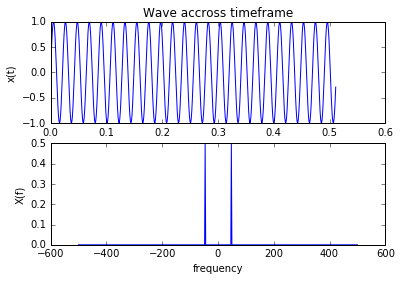

In [65]:
f0 = 46.875
fs = 1000 # Hz
N = 512
w0 = 2 * math.pi * f0

def plot_wave_and_fft(timeframe, wave):
    # FFT
    freq = np.linspace(-fs/2, fs/2, len(wave));
    strength = np.abs(np.fft.fftshift(np.fft.fft(wave))) / len(wave)


    plt.plot(timeframe, wave)
    plt.plot(freq, strength)


    plt.subplot(2, 1, 1)
    plt.plot(timeframe, wave)
    plt.title('Wave accross timeframe')
    plt.xlabel('time')
    plt.ylabel('x(t)')

    plt.subplot(2, 1, 2)
    plt.plot(freq, strength)
    plt.xlabel('frequency')
    plt.ylabel('X(f)')

    plt.show()
    
timeframe = np.linspace(0, (N - 1) * 1e-3, N)
wave = np.sin(w0 * timeframe)

plot_wave_and_fft(timeframe, wave)


# Question 2

## zero pad

[ 0.          0.29028468  0.55557023 ...,  0.          0.          0.        ] 4096


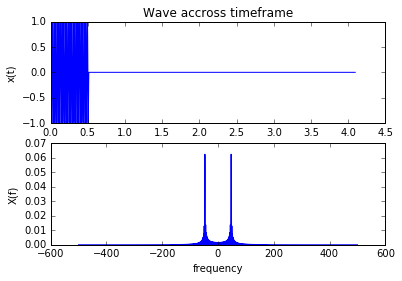

In [55]:
N2 = 4096
timeframe2 = np.linspace(0, (N2 - 1) * 1e-3, N2)
wave2 = np.append(wave, np.zeros(N2 - len(wave)))
print wave2, len(wave2)
plot_wave_and_fft(timeframe2, wave2)


TypeError: unsupported operand type(s) for +: 'float' and 'builtin_function_or_method'